In [1]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model=InceptionV3(weights='imagenet')

In [3]:
def predict_top(model, img_path, n):
    img=image.load_img(img_path, target_size=(299, 299))
    plt.imshow(img)
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    x=preprocess_input(x)
    preds=model.predict(x)
    print('Predicted:', decode_predictions(preds, top=n)[0])

40960/35363 [==================================] - 1s 23us/step
Predicted: [('n04507155', 'umbrella', 0.89157027), ('n04254680', 'soccer_ball', 0.064889506), ('n03888257', 'parachute', 0.013347267), ('n03127747', 'crash_helmet', 0.004899684), ('n03792972', 'mountain_tent', 0.0034554915)]


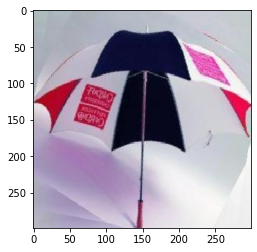

In [4]:
predict_top(model, '101_ObjectCategories/umbrella/image_0001.jpg', 5)

Predicted: [('n02704792', 'amphibian', 0.18795703), ('n04389033', 'tank', 0.07880853), ('n04252077', 'snowmobile', 0.055178743), ('n04273569', 'speedboat', 0.05107287), ('n09332890', 'lakeside', 0.045484085)]


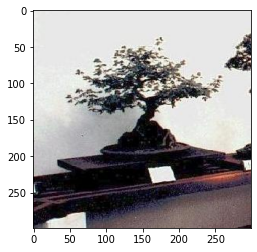

In [5]:
predict_top(model, '101_ObjectCategories/bonsai/image_0001.jpg', 5)

Predicted: [('n03272010', 'electric_guitar', 0.89450884), ('n02676566', 'acoustic_guitar', 0.050248936), ('n04296562', 'stage', 0.00983955), ('n03929660', 'pick', 0.006491072), ('n02787622', 'banjo', 0.002263419)]


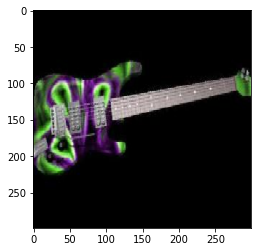

In [6]:
predict_top(model, '101_ObjectCategories/electric_guitar/image_0001.jpg', 5)

In [7]:
print([ly.name for ly in model.layers])

['input_1', 'conv2d_1', 'batch_normalization_1', 'activation_1', 'conv2d_2', 'batch_normalization_2', 'activation_2', 'conv2d_3', 'batch_normalization_3', 'activation_3', 'max_pooling2d_1', 'conv2d_4', 'batch_normalization_4', 'activation_4', 'conv2d_5', 'batch_normalization_5', 'activation_5', 'max_pooling2d_2', 'conv2d_9', 'batch_normalization_9', 'activation_9', 'conv2d_7', 'conv2d_10', 'batch_normalization_7', 'batch_normalization_10', 'activation_7', 'activation_10', 'average_pooling2d_1', 'conv2d_6', 'conv2d_8', 'conv2d_11', 'conv2d_12', 'batch_normalization_6', 'batch_normalization_8', 'batch_normalization_11', 'batch_normalization_12', 'activation_6', 'activation_8', 'activation_11', 'activation_12', 'mixed0', 'conv2d_16', 'batch_normalization_16', 'activation_16', 'conv2d_14', 'conv2d_17', 'batch_normalization_14', 'batch_normalization_17', 'activation_14', 'activation_17', 'average_pooling2d_2', 'conv2d_13', 'conv2d_15', 'conv2d_18', 'conv2d_19', 'batch_normalization_13', 'ba

In [8]:
# 选择任意一层提取特征
from keras.models import Model
feat_model = Model(inputs=model.input,
                   outputs=model.get_layer('avg_pool').output)


def extract_features(feat_model, img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return feat_model.predict(x)

In [9]:
f=extract_features(feat_model, '101_ObjectCategories/bonsai/image_0001.jpg')
print(f.shape)
print(f)

(1, 2048)
[[0.1208221  0.08375683 0.8061241  ... 0.47074452 0.51320404 0.3411568 ]]
